# 32931 Technology Research Methods (SPRING 2019)
Quantitative Lab 5
(using PYTHON)

Compiled by Mahrita Harahap

# Explore the multivariate dataset: Correlation Matrix and Matrix Plot

We will run a linear regression model, in which we look at the relationship of price with a combination of the other variables in the data set. In this case, Price is considered the response variable and the other variables are the predictors. Sometimes, when we have a large number of potential predictors, we allow an model selection method to select the predictors that are useful.

Before we undertake any model selection methods, it is usually good practice to have a look at the pairwise relationships of the multivariate dataset.


In [13]:
import matplotlib.pyplot as plt
import pylab
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms

data=pd.read_csv('C:/Users/ActiveXchange/Downloads/houses.csv')
data



,Price,Floor,Block,Rooms,Age,CentralHeating
0,52.00,111.0,830,5,6.2,no
1,54.75,128.0,710,5,7.5,no
2,57.50,101.0,1000,5,4.2,no
3,57.50,131.0,690,6,8.8,no
4,59.75,93.0,900,5,1.9,yes
5,62.50,112.0,640,6,5.2,no
6,64.75,137.6,700,6,6.6,yes
7,67.25,148.5,740,6,2.3,no
8,67.50,113.5,660,6,6.1,no
9,69.75,152.0,645,7,9.2,no


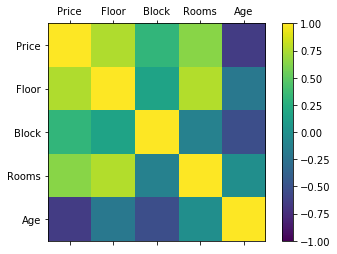

In [14]:
# Correction Matrix Plot
import matplotlib.pyplot as plt
import pandas
import numpy
names = ['Price','Floor','Block','Rooms','Age','CentralHeating']
correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = numpy.arange(0,5,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

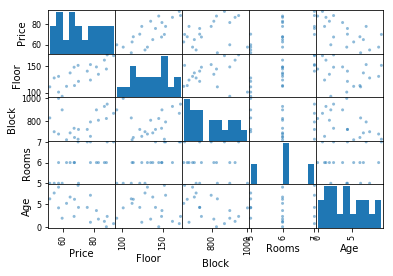

In [15]:
# Scatterplot Matrix
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
names = ['Price','Floor','Block','Rooms','Age','CentralHeating']
scatter_matrix(data)
plt.show()

# All possible regressions

To consider all possible models is time consuming unless there are only a small number of models because there are 2p possible linear regression models and we require procedures for choosing one (or a small number) of them. Still difficult to choose “best” model as lots of test results will be available giving conflicting information.

Can select the best models based on Adjusted R2, Mallows Cp, AIC or BIC. Adjusted R2 is used instead of R2 because penalises for the number of parameters and sample size.

Usually too many to manually consider all models so need an automatic system for deciding which models to consider and in which order. Better to use a logical procedure like forward selection, backward elimination or stepwise, where each test is acted upon sequentially and do not ignore any ‘substantive theory’.


In [33]:
def processSubset(feature_set):
    # Fit model on feature_set and calculate RSS
    model = sm.OLS(y,X[list(feature_set)])
    regr = model.fit()
    RSS = ((regr.predict(X[list(feature_set)]) - y) ** 2).sum()
    return {"model":regr, "RSS":RSS}

In [34]:
def getBest(k):
    
    tic = time.time()
    
    results = []
    
    for combo in itertools.combinations(X.columns, k):
        results.append(processSubset(combo))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['RSS'].argmin()]
    
    toc = time.time()
    print("Processed", models.shape[0], "models on", k, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [30]:

y = data.Price
# Drop the column with the independent variable (Price), and columns for which we created dummy variables
X=data.drop(['Price','CentralHeating'], axis=1).astype('float64')


In [38]:
%matplotlib inline
import pandas as pd
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [39]:
# Could take quite awhile to complete...

models_best = pd.DataFrame(columns=["RSS", "model"])

tic = time.time()
for i in range(1,8):
    models_best.loc[i] = getBest(i)

toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

Processed 4 models on 1 predictors in 0.010981082916259766 seconds.
Processed 6 models on 2 predictors in 0.012965679168701172 seconds.
Processed 4 models on 3 predictors in 0.009972810745239258 seconds.
Processed 1 models on 4 predictors in 0.002992391586303711 seconds.


C:\Users\ActiveXchange\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  


KeyError: 'RSS'

In [40]:
models_best

,RSS,model
1,1298.066714,<statsmodels.regression.linear_model.Regressio...
2,606.774306,<statsmodels.regression.linear_model.Regressio...
3,437.198782,<statsmodels.regression.linear_model.Regressio...
4,378.270428,<statsmodels.regression.linear_model.Regressio...


In [41]:
print(models_best.loc[2, "model"].summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     1552.
Date:                Thu, 05 Sep 2019   Prob (F-statistic):           7.03e-21
Time:                        16:37:32   Log-Likelihood:                -62.503
No. Observations:                  20   AIC:                             129.0
Df Residuals:                      18   BIC:                             131.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Rooms         13.7187      0.389     35.297      0.0